# **Artificial Neural Networks Project: Street View Housing Number Digit Recognition**

--------------
## **Context** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
## **Objective**
----------------

To build a feed-forward neural network model that can recognize the digits in the images. 

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [2]:
import sys

print(sys.version)

3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]


In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [4]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

**Let us check the version of tensorflow.**

In [5]:
print(tf.__version__)

2.8.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [6]:
import h5py

# Open the file as read only
# User can make changes in the path as required

h5f = h5py.File('/content/drive/MyDrive/Colab Notebooks/ADSP/SVHN_single_grey1.h5', 'r')

# Load the training and the test dataset

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]


# Close this file

h5f.close()

Let's check the number of images in the training and the testing dataset.

In [7]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**
- There are 42,000 images in the training data and 18,000 images in the testing data. 

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

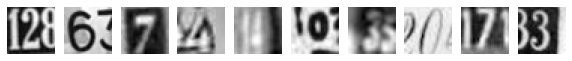

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [8]:
# Visualizing the first 10 images in the dataset and printing their labels

plt.figure(figsize = (10, 1))

for i in range(10):

    plt.subplot(1, 10, i+1)

    plt.imshow(X_train[i], cmap = "gray")

    plt.axis('off')

plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [9]:
# Shape and the array of pixels for the first image

print("Shape:", X_train[0].shape)

print()

print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [10]:
# Reshaping the dataset to flatten them. We are reshaping the 2D image into 1D array

X_train = X_train.reshape(X_train.shape[0], 1024)

X_test = X_test.reshape(X_test.shape[0], 1024)

In [11]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train.astype('float32') / 255

X_test = X_test.astype('float32') / 255

In [12]:
# New shape 

print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


In [13]:
# One-hot encode output

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

# Test labels

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:**
- Notice that each entry of the target variable is a one-hot encoded vector instead of a single label.

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

In [14]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable. 
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

In [27]:
# Define the model

def nn_model_1():

    model = Sequential() 

    # Add layers as per the architecture mentioned above in the same sequence
    
    model.add(Dense(64, activation = 'relu' , input_shape= (1024, )))

    model.add(Dense(32, activation = 'relu' ))

    model.add(Dense(10, activation = 'softmax'))
      
    # Compile the model

    model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
    
    return model

In [28]:
# Build the model

model_1 = nn_model_1()

In [29]:
# Print the summary

model_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                65600     
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Fit the model

history_model_1 = model_1.fit(X_train, y_train, validation_split= 0.02, verbose =1, batch_size =128, epochs = 20)

Epoch 1/20
322/322 [==============================] - 1s 4ms/step - loss: 1.2058 - accuracy: 0.6081 - val_loss: 1.2130 - val_accuracy: 0.6071
Epoch 2/20
322/322 [==============================] - 1s 4ms/step - loss: 1.2014 - accuracy: 0.6103 - val_loss: 1.2189 - val_accuracy: 0.6024
Epoch 3/20
322/322 [==============================] - 1s 4ms/step - loss: 1.2003 - accuracy: 0.6129 - val_loss: 1.2298 - val_accuracy: 0.5988
Epoch 4/20
322/322 [==============================] - 1s 4ms/step - loss: 1.2098 - accuracy: 0.6085 - val_loss: 1.2266 - val_accuracy: 0.5964
Epoch 5/20
322/322 [==============================] - 1s 4ms/step - loss: 1.2016 - accuracy: 0.6102 - val_loss: 1.2075 - val_accuracy: 0.6024
Epoch 6/20
322/322 [==============================] - 1s 4ms/step - loss: 1.1985 - accuracy: 0.6141 - val_loss: 1.2266 - val_accuracy: 0.6000
Epoch 7/20
322/322 [==============================] - 1s 4ms/step - loss: 1.2008 - accuracy: 0.6117 - val_loss: 1.2194 - val_accuracy: 0.6024
Epoch 

### **Plotting the validation and training accuracies**

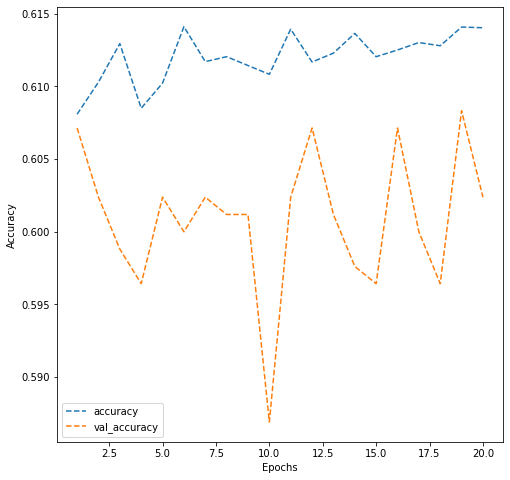

In [51]:
# Plotting the accuracies

dict_hist = history_model_1.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

Observations:
- I fit the model quite a few times and it gave me very very different results. The first time I fit the model, it gave me a resulting graph of accuracies vs epochs that looks similiar to the original notebook. Then I started getting accuracies starting around 0.60 which is where the accuracy levels out for this model.
- The accuracy of the validation results does not improve as epochs increase.
- I am confused because the original line in the notebook fit much better. The original graph had a starting accuracy that was lower than the graphs I have been generating.
- This graph is a bit disorienting because the scale on the accuracy is super small. Really what seems to be happinging is that for the past 4 times I have run it, my first epoch is getting a high starting accuracy value. I wonder if by running it multiple times, I started with a higher epoch number for some reason.
- Accuracy never goes above 0.65 which is not as high as I would like to get it for utilizing this kind of analysis.

Let's build one more model with higher complexity and see if we can improve the performance of the model. 

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [52]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

In [53]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

In [74]:
# Define the model

def nn_model_2():

    model = Sequential()  
    
    # Add layers as per the architecture mentioned above in the same sequence
    
    model.add(Dense(256, activation = 'relu', input_shape =(1024,)))

    model.add(Dense(128, activation ='relu'))

    model.add(Dropout(0.2))

    model.add(Dense(64, activation ='relu'))

    model.add(Dense(64, activation ='relu'))

    model.add(Dense(32, activation ='relu'))

    model.add(BatchNormalization())

    model.add(Dense(10, activation = 'softmax'))
    
    # Compile the model
    optimizer = Adam(learning_rate = 0.0005)
    model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    
    return model

In [75]:
# Build the model

model_2 = nn_model_2()

In [76]:
# Print the model summary
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 256)               262400    
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 64)                4160      
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_2 (Batc  (None, 32)              

In [77]:
# Fit the model

history_model_2 = model_2.fit(X_train, y_train, validation_split=0.2, batch_size=128, verbose=1, epochs=30)

Epoch 1/30
263/263 [==============================] - 4s 11ms/step - loss: 2.3405 - accuracy: 0.1054 - val_loss: 2.2982 - val_accuracy: 0.1208
Epoch 2/30
263/263 [==============================] - 3s 10ms/step - loss: 2.1418 - accuracy: 0.2073 - val_loss: 1.9761 - val_accuracy: 0.2924
Epoch 3/30
263/263 [==============================] - 3s 11ms/step - loss: 1.6478 - accuracy: 0.4213 - val_loss: 1.4643 - val_accuracy: 0.5007
Epoch 4/30
263/263 [==============================] - 3s 10ms/step - loss: 1.3937 - accuracy: 0.5298 - val_loss: 1.2070 - val_accuracy: 0.6151
Epoch 5/30
263/263 [==============================] - 3s 11ms/step - loss: 1.2578 - accuracy: 0.5869 - val_loss: 1.1566 - val_accuracy: 0.6287
Epoch 6/30
263/263 [==============================] - 3s 10ms/step - loss: 1.1660 - accuracy: 0.6249 - val_loss: 1.0511 - val_accuracy: 0.6644
Epoch 7/30
263/263 [==============================] - 3s 10ms/step - loss: 1.0909 - accuracy: 0.6532 - val_loss: 1.0285 - val_accuracy: 0.6740

### **Plotting the validation and training accuracies**

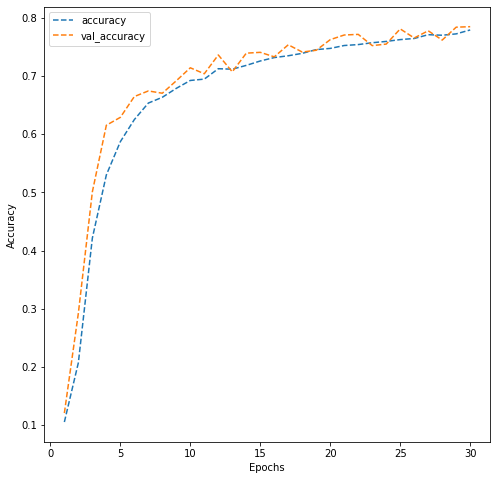

In [78]:
# Plotting the accuracies

dict_hist = history_model_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

Observations:
- I don't see the same pattern of having accuracies starting high in my graph here.
- The accuracy is better with this model than the previous model!
- After 30 epochs, we are around 0.78 accuracy.
- Accuracy and validation are very similiar curves.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [79]:
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [80]:
# Converting each entry to single label from one-hot encoded vector

y_test = np.argmax(y_test, axis = -1)

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1814
           1       0.75      0.84      0.79      1828
           2       0.82      0.80      0.81      1803
           3       0.66      0.80      0.72      1719
           4       0.77      0.86      0.81      1812
           5       0.79      0.71      0.75      1768
           6       0.85      0.73      0.79      1832
           7       0.84      0.82      0.83      1808
           8       0.73      0.75      0.74      1812
           9       0.80      0.74      0.77      1804

    accuracy                           0.78     18000
   macro avg       0.79      0.78      0.78     18000
weighted avg       0.79      0.78      0.78     18000



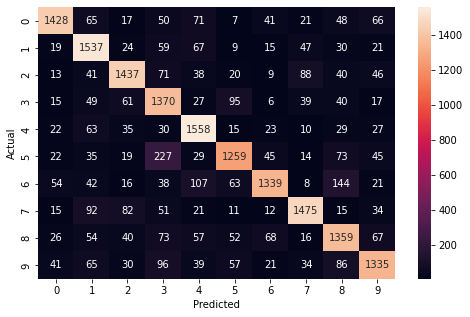

In [81]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test, test_pred)     #Write the code for creating confusion matrix using actual labels (y_test) and predicted labels (test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

Final Observations:
- In this notebook, I built a feed- forward neural network model that can recognize digits from the SVHN dataset containing over 600,000 digits cropped from street photos.
- Our model has weighted average of percision equal to 0.79 and weighted average of recall at 0.78.
- You can see from the confusion matrix that sometimes 5 is mistaken for 3. This makes sense as these numbers have similiar shapes.
- Other numbers mistaken for each other are 6 mistaken for 8, 3 mistaken for 5, 6 mistaken for 4.
- Precision for 3 is relatively low at 66%. 0 is high at 86%
- Recall for 4 is relatively high at 86%.
